In [1]:
# from .. import thinkstats2
import nsfg
import thinkstats2
import thinkplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
preg = nsfg.ReadFemPreg()
live = preg[preg.outcome == 1]

In [3]:
preg[['agepreg']]

,agepreg
0,33.16
1,39.25
2,14.33
3,17.83
4,18.33
...,...
13588,17.91
13589,18.50
13590,19.75
13591,21.58


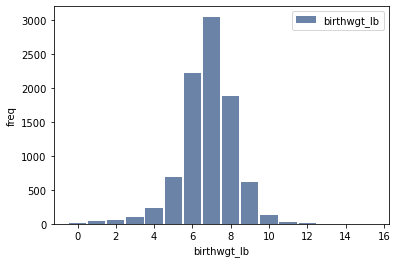

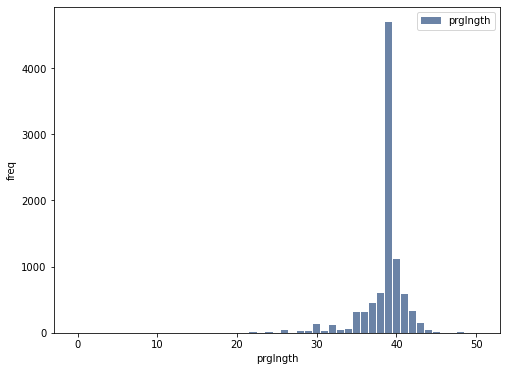

<Figure size 576x432 with 0 Axes>

In [4]:
hist = thinkstats2.Hist(live.birthwgt_lb, label='birthwgt_lb')
hist3 = thinkstats2.Hist(live.prglngth, label='prglngth')

hist_list = [hist, hist3]
for h in hist_list:
    
    thinkplot.Hist(h)
    thinkplot.Show(xlabel=h.label, ylabel='freq')

<AxesSubplot:>

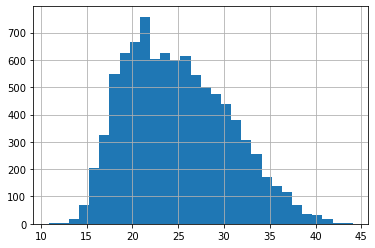

In [5]:
live.agepreg.hist(bins=30)

In [6]:
a = pd.DataFrame(live.prglngth.value_counts()).reset_index().sort_values(by='index',
                                                                     ascending=True)
a.columns = ['weeks', 'count']
a.tail(7)

,weeks,count
8,43,148
13,44,46
19,45,10
34,46,1
28,47,1
21,48,7
25,50,2


In [6]:
first = live[live.birthord == 1]
others = live[live.birthord != 1]

In [7]:
first_hist = thinkstats2.Hist(first.prglngth)
other_hist = thinkstats2.Hist(others.prglngth)

In [8]:
# first_hist = first.prglngth.value_counts().to_dict()
# other_hist = others.prglngth.value_counts().to_dict()

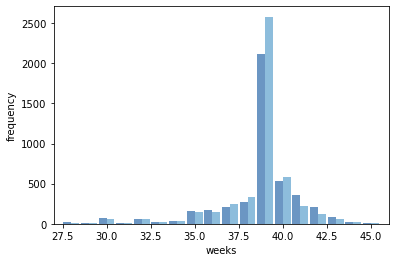

<Figure size 576x432 with 0 Axes>

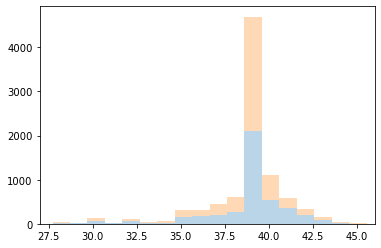

In [9]:
width = 0.45
plt.xlim([27, 46])
thinkplot.PrePlot(2)
thinkplot.Hist(first_hist, align='right', width=width)
thinkplot.Hist(other_hist, align='left', width=width)
thinkplot.Show(xlabel='weeks', ylabel='frequency')


# plotting it stacked (personally find it easier to understand)
plt.figure(figsize=[6, 4])
plt.xlim([27, 46])
plt.hist([first.prglngth, others.prglngth],
          bins=100, range=(1,100), stacked=True, alpha=.3)
plt.show()

In [10]:
def cohens_d1(group1, group2):
    mean_diff = group1.mean() - group2.mean()
    sd_pooled = np.sqrt((group1.var() + group2.var())/2)
    return mean_diff/sd_pooled
    

In [11]:
first_mean = first.totalwgt_lb.mean()
others_mean = others.totalwgt_lb.mean()
mean_diff = first_mean - others_mean

print('first mean : {}\nothers mean: {}\nmean diff: {}'.format(first_mean,
                                                               others_mean, mean_diff))
print()
print("Effect Size (Cohen's D): ",cohens_d1(first.totalwgt_lb, others.totalwgt_lb))

first mean : 7.201094430437772
others mean: 7.325855614973262
mean diff: -0.12476118453549034

Effect Size (Cohen's D):  -0.08864367587767745
